# Домашнее задание к занятию 2.1: Деревья решений. Классификация

## Обзор прошедшего занятия

Что мы делали в классе:

**Задание 1**
* строили деревья
* критерии информативности которых написали даже сами
* визуализировали границы принятия решений в 2d
* и рисовали сами деревья


**Задание 2**
* приняли участие в соревновании на Kaggle, переварив кучу текстовых фичей в численные, проведя кросс-валидацию и сделав сабмит


**Задание 3**
* построили руками несколько метрик качества бинарной классификации


**Задание 4**
* использовали их для оценки классификации разделения статей Ведомостей по топикам

*дополнительно было много приятных ништяков. Например, облако слов, мультипоточность в целях парсинга, удобный инструмент для нахождения правильной css разметки, сохранение моделей в статичные файлы, разделение строк на слова и лемматизация этих слов*

## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)

In [294]:
import pandas as pd
import numpy as np

In [295]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv ('test.csv')
sample_submission = pd.read_csv ('gender_submission.csv')

In [327]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [296]:
Y_train = X_train.Survived
X_train.drop('Survived', axis = 1, inplace= True)

In [297]:
X_train['isTest'] = 0
X_test['isTest'] = 1

In [298]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [299]:
df= pd.concat ([X_train, X_test])

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
isTest         1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [301]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.Sex)
df['SexEncode'] =pd.Series( data = le.transform( df['Sex'] ) )

In [302]:
def status (row):
    status = ""
    if "Mr." in row:
        status = "Mr"
    if "Miss" in row:
        status = "Miss"
    if "Mrs." in row:
        status = "Mrs"
    if "Master." in row:
        status = "Master"
    if "Rev." in row:
        status = "Rev"
    if "Dr." in row:
        status = "Dr"
    else:
        status = "Other"
    return status

In [303]:
df['PersonStatus'] = df.Name.apply (status)

In [304]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'isTest', 'SexEncode',
       'PersonStatus'],
      dtype='object')

In [305]:
df.drop([ 'PassengerId',  'Name', 'Sex', 
       'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [306]:
df.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [307]:
df = pd.get_dummies (df , columns=['PersonStatus','Parch', 'SibSp'])

In [308]:
columns = df.columns

In [309]:
from sklearn.preprocessing import Imputer
imputers = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputers.fit(df)
df = imputers.transform(df)
df=  pd.DataFrame(df, columns=columns)

In [310]:
df.head()

,Pclass,Age,isTest,SexEncode,PersonStatus_Dr,PersonStatus_Other,Parch_0,Parch_1,Parch_2,Parch_3,...,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,3.0,22.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,38.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,35.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
Pclass                1309 non-null float64
Age                   1309 non-null float64
isTest                1309 non-null float64
SexEncode             1309 non-null float64
PersonStatus_Dr       1309 non-null float64
PersonStatus_Other    1309 non-null float64
Parch_0               1309 non-null float64
Parch_1               1309 non-null float64
Parch_2               1309 non-null float64
Parch_3               1309 non-null float64
Parch_4               1309 non-null float64
Parch_5               1309 non-null float64
Parch_6               1309 non-null float64
Parch_9               1309 non-null float64
SibSp_0               1309 non-null float64
SibSp_1               1309 non-null float64
SibSp_2               1309 non-null float64
SibSp_3               1309 non-null float64
SibSp_4               1309 non-null float64
SibSp_5               1309 non-null float64
SibSp_8      

In [312]:
X_train = df[df.isTest==0].drop('isTest', axis=1)
X_test = df[df.isTest==1].drop('isTest', axis=1)
columns = X_train.columns

In [313]:
X_train.head()

,Pclass,Age,SexEncode,PersonStatus_Dr,PersonStatus_Other,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,3.0,22.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,38.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,35.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit (X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns)

In [315]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit (X_test)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=columns)

In [316]:
X_test.head()

,Pclass,Age,SexEncode,PersonStatus_Dr,PersonStatus_Other,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0.873482,0.341348,0.787499,-0.04897,0.04897,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.069338,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897,-0.069338
1,0.873482,1.331807,-1.269843,-0.04897,0.04897,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.069338,-1.447859,1.673320,-0.186154,-0.098295,-0.098295,-0.04897,-0.069338
2,-0.315819,2.520359,-1.269843,-0.04897,0.04897,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.069338,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897,-0.069338
3,0.873482,-0.252928,-1.269843,-0.04897,0.04897,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.069338,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897,-0.069338
4,0.873482,-0.649112,0.787499,-0.04897,0.04897,-1.856558,2.65301,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.069338,-1.447859,1.673320,-0.186154,-0.098295,-0.098295,-0.04897,-0.069338


In [317]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [318]:
depths = np.arange(1,10)
min_samples_split = np.arange(2,10)
criterion = ['gini','entropy']
grid = {'max_depth': depths, 'min_samples_split': min_samples_split, 'criterion' : criterion }
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [319]:
%%time
gridsearch.fit(X_train, Y_train)

Wall time: 3.91 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [320]:
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [321]:
clf_final = DecisionTreeClassifier(max_depth=2, min_samples_split= 2)
clf_final.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [330]:
y_pred_proba = clf_final.predict_proba(X_test)
y_pred = clf_final.predict(X_test)

In [336]:
submit = pd.DataFrame(y_pred, columns=sample_submission.columns[1:])
submit['PassengerId'] = sample_submission.PassengerId
submit = submit[[submit.columns[-1]]+list(submit.columns[:-1])]
submit.to_csv('submit.csv', index=False)

In [338]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

([<matplotlib.axis.YTick at 0x1d77553c128>,
 <a list of 20 Text yticklabel objects>)

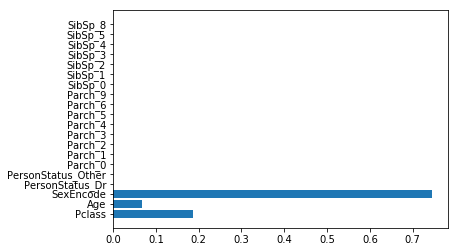

In [340]:
plt.barh(np.arange(len(clf_final.feature_importances_)), clf_final.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)

In [342]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [344]:
get_tree_dot_view(clf_final, list(X_train.columns), list(le.classes_))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="SexEncode <= -0.309\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = female", fillcolor="#e5813960"] ;
1 [label="Pclass <= 0.229\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = male", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = male", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="gini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = female", fillcolor="#e5813900"] ;
1 -> 3 ;
4 [label="Age <= -1.788\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = female", fillcolor="#e58139c4"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = male", fillcolor="#399de57f"] ;
4 -> 5 ;
6 [label="gini = 0.28\nsamples = 553\nvalue = [460, 93]\nclass = female", fillcolor="#e58139cb"] ;
4 -> 6 ;
}
